In [191]:
"""Import relevant libraries"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # Not necessary in Jupyter Notebook

In [192]:
"""Import excel file"""
df = pd.read_excel('od_data.xlsx',header = None) # Read excel file and store as a pandas dataframe

In [193]:
"""Data cleaning"""
data = df.loc[28:108,2:35]     # Select out the relevant data & store in new dataframe
data.columns = df.loc[27,2:35] # Set approriate column names by calling them from df dataframe
data.index = df.loc[28:108,1]  # Set approriate row names by calling them from df dataframe
# data.index.name = None         # Can be used to erase the index column name, if desired

In [194]:
"""Calculate & build final data"""

'''Initialize useful dictionary and dataframe'''
avg = {}                   # Used to iteratively set variables
OD_data = pd.DataFrame({}) # Scaffold for final dataframe

'''Perform calculations'''
avg['avg1'] = (data['A1'].values + data['B1'])/2 # Find the avg. of the 2 relevant neg. controls & hold data in 'avg' dict.
OD_data['Neg. Control: Group 1'] = avg['avg1']   # Add the data to OD_data dataframe 

### Repeat above process iteratively for the rest of the groups, this time from all 3 samples
for i in range(1,9): # for i starting at 1 and ending at 8...
    ### Index each sample from the data dataframe & convert to a numpy array, calc. avg., hold data in dict.
    avg['avg'+str(i+1)] = (data['A'+str(i+1)].values 
                         + data['B'+str(i+1)].values
                         + data['C'+str(i+1)].values)/3
    OD_data['Group '+str(i+1)] = avg['avg'+str(i)] # Call previously stored data from dict. and add it to OD_data dataframe

# OD_data.index = data.index # Can be used to transfer index from old dataframe, if desired

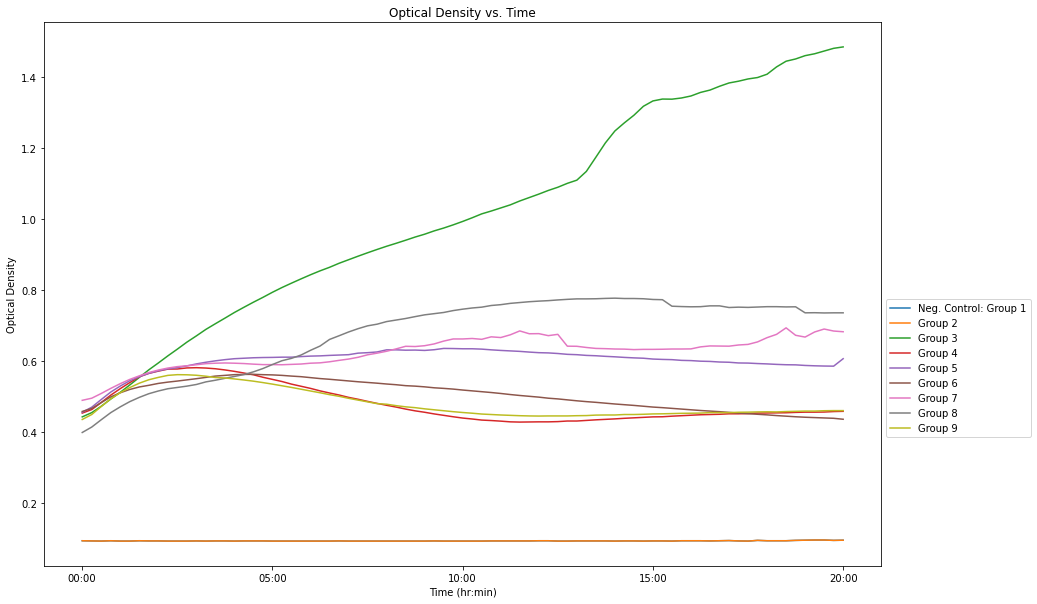

In [195]:
"""Display data plot"""
OD_data.plot(figsize=(15,10),                                   # Initialize plot from dataframe with x to y ratio of 15:10
             title = 'Optical Density vs. Time',                # Set title
             xlabel = 'Time (hr:min)',                          # Set x-axis label
             ylabel = 'Optical Density',                        # Set y-axis label
             xticks = ['00:00','05:00','10:00','15:00','20:00'] # Set x-axis ticks
            ).legend(bbox_to_anchor=(1, 0.5))                   # Set top left of the legend to center right of the plot
plt.show() # Show the plot (not necessary in Jupyter Notebook)